<a href="https://colab.research.google.com/github/YuditDayan/mlcourse-Nov22/blob/main/My_linear_regression_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://githubtocolab.com/alevant/mlcourse-Nov22/blob/main/linear_regression_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab"/></a>

In [1]:
!git clone https://github.com/YuditDayan/mlcourse-Nov22 mlcourse

Cloning into 'mlcourse'...
remote: Enumerating objects: 67, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 67 (delta 6), reused 1 (delta 1), pack-reused 57
Unpacking objects: 100% (67/67), done.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import datetime


This is ice cream data  - x- independent varalbe - temp, y- sales

In [3]:
x = np.array([14.2, 16.4, 11.9, 15.2,18.5, 22.1, 19.4, 25.1, 23.4, 18.1, 22.6, 17.2])
y = np.array([215,325,185,332,406,522,412,614,544,421,445,408])

Let's plot a scatter plot

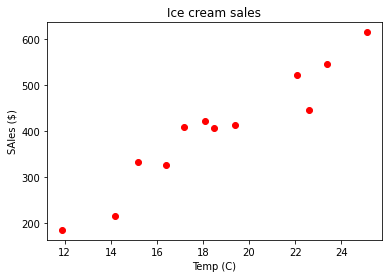

In [4]:
plt.scatter(x,y, color = 'red')
plt.title('Ice cream sales')
plt.xlabel('Temp (C)')
plt.ylabel('SAles ($)')
plt.show()



Train model on the data



In [35]:
# training the simple linear regresion on trainning set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()#class instance
x = x.reshape(-1, 1)#change from row vector to column vector because LinearRegression works with column vector.
regressor.fit(x ,y)#find the model 
y_predict = regressor.predict(x)

In [9]:
print('The parameters of the model y=ax+b are')
print(f'a={regressor.coef_[0]}')
print(f'b={regressor.intercept_}')


The parameters of the model y=ax+b are
a=30.087861794245185
b=-159.4741523408622


Plot data and the model

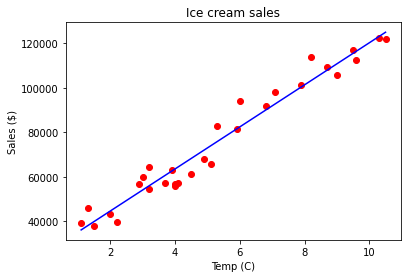

In [36]:
plt.scatter(x,y, color = 'red')
plt.plot(x,y_predict, color ='blue')
plt.title('Ice cream sales')
plt.xlabel('Temp (C)')
plt.ylabel('Sales ($)')
plt.show()

Predict sales at 13 deg

In [11]:
y_predict_13 = regressor.predict([[13]])
y_predict_13

array([231.66805098])

Plot residuals

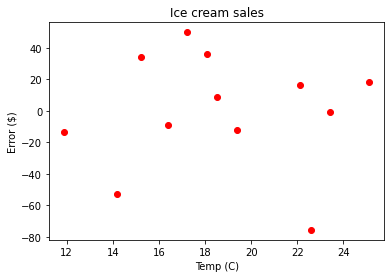

In [15]:
plt.scatter(x,y-y_predict, color = 'red')
#plt.plot(x.min(), x.max(),y[0,0], color = 'green')
plt.title('Ice cream sales')
plt.xlabel('Temp (C)')
plt.ylabel('Error ($)')
plt.show()

Show metrics of model goodness

In [16]:
from sklearn import metrics
metrics.mean_squared_error(y, y_predict)
print("MSE: {:.4f}".format(metrics.mean_squared_error(y, y_predict)))
R2=regressor.score(x,y)
print("R^2: {:.4f}".format(regressor.score(x.reshape(-1, 1),y)))

MSE: 1211.3584
R^2: 0.9168


Another way to calculate linear regression model including p=value

In [ ]:
from scipy import stats
slope, inter, rval, pval, se = stats.linregress(x,y)
print(f'a={slope}')
print(f'b={inter}')
print("R^2: {:.4f}".format(rval**2))
print("p-val: {:.4f}".format(pval))

a=30.087861794245196
b=-159.47415234086242
R^2: 0.9168
p-val: 0.0000


Another larger Data Set we will split data to train and test

In [17]:
df =pd.read_csv("mlcourse/data/Salary_Data.csv")

In [18]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [23]:
x=df.iloc[:,-2].values
y=df.iloc[:,-1].values
y

array([ 39343.,  46205.,  37731.,  43525.,  39891.,  56642.,  60150.,
        54445.,  64445.,  57189.,  63218.,  55794.,  56957.,  57081.,
        61111.,  67938.,  66029.,  83088.,  81363.,  93940.,  91738.,
        98273., 101302., 113812., 109431., 105582., 116969., 112635.,
       122391., 121872.])

Exercise: For this example 

1.  Show scatter plot
2.  Fit the model get coef a&b
3.  Plot data and fittef model
4.  Check residuals
5.  Calculate MSE and R2

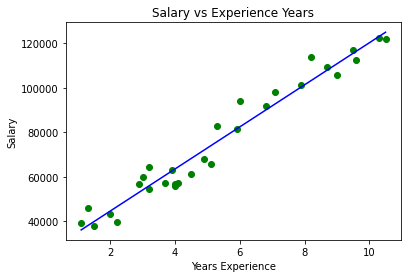

In [44]:
plt.scatter(x,y, color = 'green')
regressor = LinearRegression()#class instance
x = x.reshape(-1, 1)#change from row vector to column vector because LinearRegression works with column vector.
regressor.fit(x ,y)#find the model 
y_predict = regressor.predict(x)
plt.plot(x,y_predict, color ='blue')
plt.title('Salary vs Experience Years')
plt.xlabel('Years Experience')
plt.ylabel('Salary')
plt.show()


AttributeError: ignored

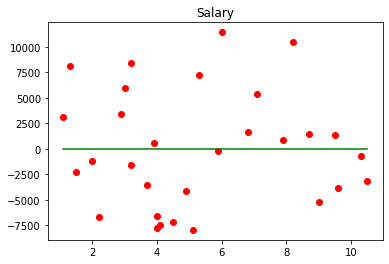

In [47]:
plt.scatter(x,y-y_predict, color = 'red')
plt.plot([x.min(),x.max()],[0,0], color='green')
plt.title('Salary')
plt.xlable('Years')
plt.ylable('Errors')
plt.show()

In [ ]:
from sklearn import metrics
metrics.mean_absolute_error(y, y_predict)
print('MSE: (:4f)'.format(MSE))



print(RMSE/y.mean()*100)#אחוז הטעות

Let's separate it now to train and test to avoid overfit

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)